### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

In [1]:
!pip install pandas==1.0.5
!pip install pandas-profiling==2.8.0

  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-1.0.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



  Using cached pandas-1.0.5-cp37-cp37m-win_amd64.whl (8.7 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=6d4b18e17ee59959f26ca3faf9438dec02a76df0de2cc280bd1b5743bf00cd6f
  Stored in directory: c:\users\srija\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=af9c569d443803ea83d7525eb4661939b13b971da204767ffc656acb4155cb13
  Stored in directory: c:\users\srija\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin imagehash
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-1.0.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

In [3]:
data = pd.read_csv('Data.csv')
movies = pd.read_csv('item.csv')
ratings = pd.read_csv('user.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
data.shape

(100000, 4)

In [6]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
data.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### Find the number of movies per genre using the item data

In [8]:
# use sum on the default axis
movie = movies['movie id'].unique().tolist()
len(movie)

1681

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
movies.shape

(1681, 22)

In [11]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
movie_genre = list(movies)
movie_genre.remove('movie id')
movie_genre

['movie title',
 'release date',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [14]:
movies['sum'] = movies[movie_genre].sum(axis=1)
movies

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


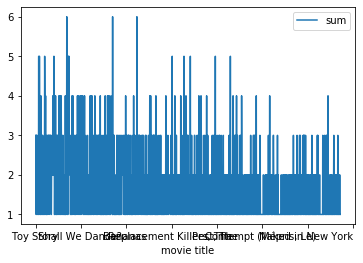

In [15]:
movies.plot(x='movie title', y='sum')

In [16]:
movies.sum(axis = 0, skipna = True)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### Find the movies that have more than one genre

In [17]:
#hint: use sum on the axis = 1
print(movies[['movie title', 'sum']] )

                              movie title  sum
0                              Toy Story     3
1                              GoldenEye     3
2                             Four Rooms     1
3                             Get Shorty     3
4                                Copycat     3
...                                   ...  ...
1676                          Mat' i syn     1
1677                           B. Monkey     2
1678                       Sliding Doors     2
1679                        You So Crazy     1
1680  Scream of Stone (Schrei aus Stein)     1

[1681 rows x 2 columns]


#### Drop the movie where the genre is unknown

In [18]:
movies_filtered = movies[movies['unknown'] <= 0] 
  
# Print the new dataframe 
print(movies_filtered)
  
# Print the shape of the dataframe 
print(movies_filtered.shape)

      movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Film-Noi

### Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

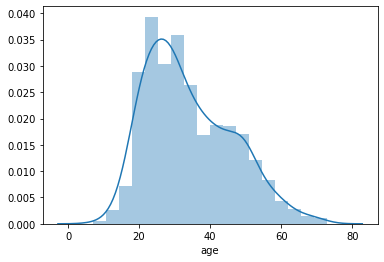

In [19]:
#your answers here
sns.distplot(ratings['age'])

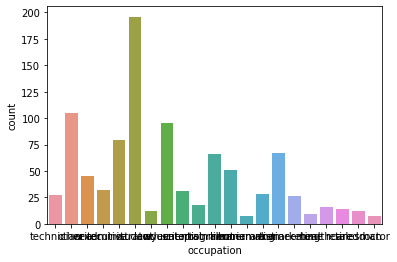

In [20]:
sns.countplot(ratings['occupation'])

In [21]:
ratings.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


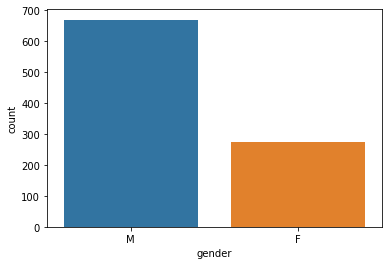

In [22]:
sns.countplot(ratings['gender'])

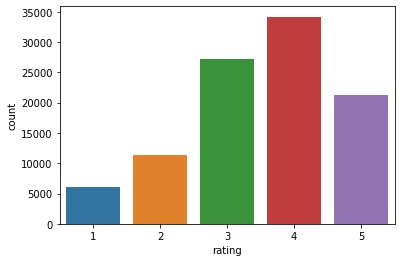

In [23]:
sns.countplot(data['rating']);

In [24]:
movies['year'] = pd.DatetimeIndex(movies['release date']).year
movies['month'] = pd.DatetimeIndex(movies['release date']).month

In [25]:
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,year,month
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,3,1995,1
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,3,1995,1
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1995,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,3,1995,1
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,3,1995,1


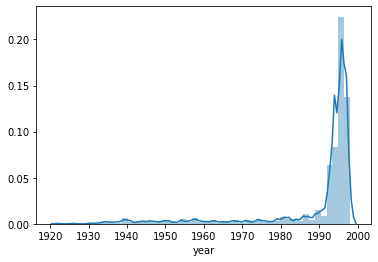

In [26]:
sns.distplot(movies['year']);

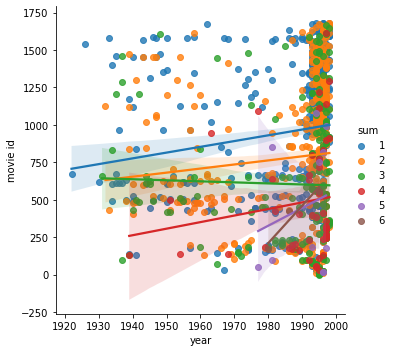

In [27]:
sns.lmplot(x="year", y="movie id", data=movies, hue='sum');

### Visualize how popularity of genres has changed over the years

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

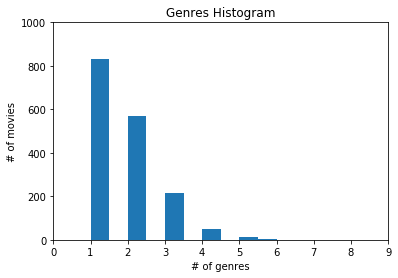

In [28]:
#Your answer here
plt.hist(movies['sum'])
plt.title("Genres Histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0, 9, 0, 1000])
plt.show()

### Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [29]:
#your answer here
data.groupby('movie id').size()

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Length: 1682, dtype: int64

In [30]:
data.groupby('movie id').sum()['rating'].sort_values(ascending = False)

movie id
50      2541
100     2111
181     2032
258     1936
174     1786
        ... 
1570       1
1366       1
1571       1
1364       1
1486       1
Name: rating, Length: 1682, dtype: int64

In [31]:
data.groupby('movie id').mean()['rating'].sort_values(ascending = False)

movie id
1293    5.0
1467    5.0
1653    5.0
814     5.0
1122    5.0
       ... 
1601    1.0
1557    1.0
1559    1.0
1561    1.0
1364    1.0
Name: rating, Length: 1682, dtype: float64

In [32]:
np.mean(data.rating)

3.52986

In [33]:
np.median(data.rating)

4.0

In [35]:
from scipy import stats
stats.mode(data.rating)

ModeResult(mode=array([4], dtype=int64), count=array([34174]))

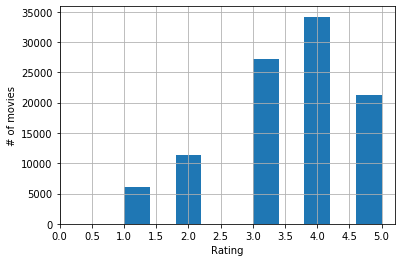

In [36]:
plt.hist(data.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [38]:
ratings_view = data[['movie id', 'rating']]
ratings_view.groupby(['movie id'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movie id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0
1292,1293,5.0
1499,1500,5.0
1188,1189,5.0
1535,1536,5.0
1466,1467,5.0


In [40]:
merged_data = pd.merge(data, movies, on='movie id')
merged_data.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,year,month
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,1997,1
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,1997,1
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,1997,1
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,1997,1
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,1997,1


In [41]:
top_movies = merged_data[['movie id', 'movie title', 'rating']]
top_movies.groupby(['movie id', 'movie title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(25)

,movie id,movie title,rating
812,814,"Great Day in Harlem, A",5.000000
1597,1599,Someone Else's America,5.000000
1199,1201,Marlene Dietrich: Shadow and Light (,5.000000
1120,1122,They Made Me a Criminal,5.000000
1651,1653,Entertaining Angels: The Dorothy Day Story,5.000000
1291,1293,Star Kid,5.000000
1498,1500,Santa with Muscles,5.000000
1187,1189,Prefontaine,5.000000
1534,1536,Aiqing wansui,5.000000
1465,1467,"Saint of Fort Washington, The",5.000000


In [42]:
top_df = top_movies.groupby(['movie id', 'movie title'], as_index=False).count()
well_rated_df = top_df[top_movies['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,movie id,movie title,rating


In [43]:
movie_ratings = pd.merge(movies, data)
lens = pd.merge(movie_ratings, ratings)

In [44]:
movies = lens.groupby('movie title').agg({'rating': [np.size, np.mean]})
movies.head(25)

rating          
                                                     size      mean
movie title                                                        
'Til There Was You                                      9  2.333333
1-900                                                   5  2.600000
101 Dalmatians                                        109  2.908257
12 Angry Men                                          125  4.344000
187                                                    41  3.024390
2 Days in the Valley                                   93  3.225806
20,000 Leagues Under the Sea                           72  3.500000
2001: A Space Odyssey                                 259  3.969112
3 Ninjas: High Noon At Mega Mountain                    5  1.000000
39 Steps, The                                          59  4.050847
8 1/2                                                  38  3.815789
8 Heads in a Duffel Bag                                 4  3.250000
8 Seconds                                               4  3.750000
A Chef in Love                                          8  4.125000
Above the Rim                                           5  3.000000
Absolute Power                                        127  3.370079
Abyss, The                                            151  3.589404
Ace Ventura: Pet Detective                            103  3.048544
Ace Ventura: When Nature Calls                         37  2.675676
Across the Sea of Time                                  4  2.750000
Addams Family Values                                   87  2.816092
Addicted to Love                                       54  3.166667
Addiction, The                                         11  2.181818
Adventures of Pinocchio, The                           39  3.051282
Adventures of Priscilla, Queen of the Desert, The     111  3.594595

In [45]:
most_rated = lens.groupby('movie title').size().sort_values(ascending=False)[:25]
most_rated

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

### See gender distribution across different genres check for the validity of the below statements

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [46]:
gender_df = ratings.groupby('gender').sum().loc[:,generes]
gender_df = gender_df.transpose()
gender_df

NameError: name 'generes' is not defined